In [104]:
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')

RSEED=42


In [115]:
data =  pd.read_csv("./data/data_classification.csv", index_col=[0])

In [116]:
data=data.dropna(subset=["target","Bi_airquality",	"trafic_airquality",	"6fold_airquality"])

In [117]:
data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,target_log,Bi_airquality,trafic_airquality,6fold_airquality
0,ID_train_0,2,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,3.831383,0.0,2.0,3.0
1,ID_train_1,3,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,4.383672,0.0,2.0,4.0
2,ID_train_10,0,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[328.68291380000005, 307.8251459, 319.0177512,...","[1.0325, 1.193333333, 1.275833333, 1.493333333...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,31.841667,...,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,3.516349,1.0,1.0,2.0
3,ID_train_100,0,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,27.491667,...,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,4.004607,0.0,2.0,3.0
4,ID_train_1000,0,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,28.750000,...,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,5.184133,0.0,3.0,5.0


## Bi KNN

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [119]:
 data_b = data.drop(["ID", "temp", "precip", "rel_humidity", "wind_dir", "wind_spd", "atmos_press" ,"trafic_airquality","6fold_airquality","target_log", "target"], axis= 1)

In [120]:
data_b.head()

,location,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,Bi_airquality
0,2,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,0.0
1,3,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,0.0
2,0,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,1.0
3,0,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,0.0
4,0,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,0.0


In [121]:
y=data_b["Bi_airquality"]
X= np.array(data_b.drop(["Bi_airquality"], axis =1),ndmin=2)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [123]:
display(X_train.shape, y_train.shape)

(10877, 43)

(10877,)

In [124]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean')

Accuracy: 0.74
Recall: 0.4
--------------------------------------------------


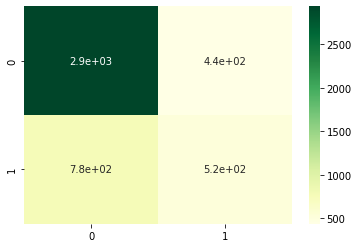

In [125]:
# Predict on test set
y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall:", recall_score(y_test, y_pred).round(2))
print("-----"*10)

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

## Randomforest, adaboost

In [127]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [134]:
rfc = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=42,
                       verbose=1)

In [136]:
n_nodes = []
max_depths = []

for ind_tree in rfc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 2512
Average maximum depth 29


In [138]:
train_rf_predictions = rfc.predict(X_train)
train_rf_probs = rfc.predict_proba(X_train)[:, 1]

rf_predictions = rfc.predict(X_test)
rf_probs = rfc.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [141]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [142]:
evaluate_model(predictions, probs, train_predictions, train_probs)

NameError: name 'predictions' is not defined

In [143]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [144]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

NameError: name 'test_labels' is not defined

## Feature importance

In [145]:
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

NameError: name 'features' is not defined

In [147]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=RSEED)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.825 total time=   7.3s
[CV 3/3] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.819 total time=   7.4s
[CV 1/3] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.813 total time=   7.5s
[CV 3/3] END bootstrap=False, max_depth=17, max_features=0.5, max_leaf_nodes=18, min_samples_split=10, n_estimators=149;, score=0.797 total time=  16.0s
[CV 2/3] END bootstrap=False, max_depth=17, max_features=0.5, max_leaf_nodes=18, min_samples_split=10, n_estimators=149;, score=0.796 total time=  16.4s
[CV 1/3] END bootstrap=False, max_depth=17, max_features=0.5, max_leaf_nodes=18, min_samples_split=10, n_estimators=149;, score=0.780 total time=  16.5s
[CV 1/3] END bootstrap=T

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [148]:
rs.best_params_

{'n_estimators': 196,
 'min_samples_split': 10,
 'max_leaf_nodes': 49,
 'max_features': 0.7,
 'max_depth': 17,
 'bootstrap': True}

In [152]:
rfc_opt = RandomForestClassifier(n_estimators=196,
                            random_state=RSEED,
                            min_samples_split = 10,
                            max_leaf_nodes = 49,
                            max_features = 0.7,
                            max_depth = 17,
                            max_features = 'sqrt',
                            bootstrap = True,
                            n_jobs=-1, verbose = 1)

# Fit on training data
rfc_opt.fit(X_train, y_train)

SyntaxError: keyword argument repeated: max_features (4103132511.py, line 1)